# Copulas: data to find the copulas

## Methods

* Moments estimation on particular copulas
* Maximum Likelihood Estimation (MLE)
* Inference For Margins (IFM)
* Canonical Maximum Likelihood Estimation (CMLE)

## pycop library

In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/msci.csv")
df.index = pd.to_datetime(df["Date"], format="%m/%d/%Y")
df = df.drop(["Date"], axis=1)

for col in df.columns.values:
    df[col] = np.log(df[col]) - np.log(df[col].shift(1))

df = df.dropna()
df.head()

,US,UK,Switzerland,Sweden,Spain,Singapore,Norway,Netherlands,Japan,Italy,HongKong,Germany,France,Denmark,Canada,Belgium,Austria,Australia
Date,,,,,,,,,,,,,,,,,,
2000-01-03,-0.006364,0.007418,0.011909,0.028405,0.007995,0.033686,0.026981,0.015721,0.008980,-0.020180,0.014310,-0.015929,0.007571,0.027345,0.004973,0.001408,0.016172,0.008597
2000-01-04,-0.040896,-0.029006,-0.023266,-0.013283,-0.014809,-0.014969,-0.029136,-0.033486,-0.016367,-0.010596,-0.013452,-0.010644,-0.029656,-0.010718,-0.030336,-0.029099,0.004299,-0.013132
2000-01-05,0.002601,-0.018383,-0.009263,-0.047861,-0.022228,-0.056299,-0.025306,-0.010066,-0.044737,-0.016052,-0.070700,-0.009102,-0.030744,-0.020555,-0.016362,-0.032784,0.004861,-0.023347
2000-01-06,-0.008583,-0.006808,0.012965,0.000126,0.001160,-0.022711,0.011887,-0.007967,-0.038755,-0.016775,-0.044639,-0.006322,-0.004272,0.009259,-0.010937,0.002415,0.001160,-0.007932
2000-01-07,0.033973,0.000371,0.016261,0.004622,0.017736,0.028970,0.010170,0.027949,-0.003075,0.025474,0.018907,0.040592,0.011951,-0.000775,0.050676,0.018796,0.018210,0.010410


Estimated parameter:  0.8025979275662826


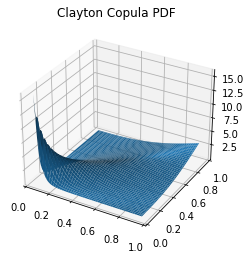

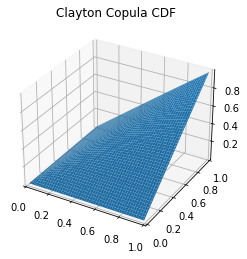

In [14]:
# One copulas
from pycop import archimedean, estimation
cop = archimedean(family="clayton")

data = df[["US","UK"]].T.values
param, cmle = estimation.fit_cmle(cop, data)
print("Estimated parameter: ", param[0])
cop.plot_pdf([3], plot_type="3d", Nsplit=100, )
cop.plot_cdf([2], plot_type="3d", Nsplit=100,)

In [12]:
# Two copulas
from pycop import mixture

cop = mixture(["clayton", "gumbel"])

param, mle = estimation.fit_cmle_mixt(cop,data )
print("Estimated parameters: ")
print("weight in Clayton copula: ", param[0])
print("weight in Gumbel copula: ", 1-param[0])
print("Clayton parameter: ", param[1])
print("Gumbel parameter: ", param[2])

Estimated parameters: 
weight in Clayton copula:  0.5515372557664843
weight in Gumbel copula:  0.44846274423351573
Clayton parameter:  0.4230894591897242
Gumbel parameter:  2.265138197700217


## pycopula

In [ ]:
import scipy
import pandas as pd

from pycopula.visualization import pdf_2d, cdf_2d, concentrationFunction
from pycopula.simulation import simulate
from pycopula.copula import ArchimedeanCopula, GaussianCopula, StudentCopula

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.random.normal(size=1000)
data = np.vstack((data, np.cos(data))).T
data = np.asarray(data).astype(np.float32)

In [ ]:
data

In [9]:
archimedean = StudentCopula(dim=2)
archimedean.fit(data, method="cmle", df_fixed=False)

Fitting Student copula.


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 2) + inhomogeneous part.

In [8]:
clayton = ArchimedeanCopula(family="clayton", dim=2)
boundAlpha = [0, None] # Greater than 0
boundLambda = [0, 0.5]
bounds = [ boundAlpha, boundLambda ]
paramX1 = { 'a': None, 'scale': 1.2 } # Hyper-parameters of Gamma
paramX2 = { 'scale': None } # Hyper-parameters of Exp
hyperParams = [ paramX1, paramX2 ] # The hyper-parameters
gamma = scipy.stats.gamma # The Gamma distribution
expon = scipy.stats.expon # The Exponential distribution
# Fitting copula with MLE method and Gamma/Exp marginals distributions
r = clayton.fit(data, method='ifm', marginals=[gamma, expon], hyper_param=hyperParams, hyper_param_bounds=bounds)
print(r)

(2.0, array([{'a': 1.0, 'scale': 1.2}, {'scale': 0.5}], dtype=object))


/home/dev/miniconda3/envs/dev/lib/python3.10/site-packages/pycopula/estimation.py:205: RuntimeWarning: divide by zero encountered in log
  return sum(np.log(marginals[j].pdf(np.transpose(X)[j], **hyperOptimizeParams[j])))
/home/dev/miniconda3/envs/dev/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/dev/miniconda3/envs/dev/lib/python3.10/site-packages/pycopula/copula.py:297: RuntimeWarning: divide by zero encountered in power
  prod *= -x[i]**(-theta - 1.)
/home/dev/miniconda3/envs/dev/lib/python3.10/site-packages/pycopula/archimedean_generators.py:20: RuntimeWarning: divide by zero encountered in power
  return (1. / theta) * (x**(-theta) - 1.)
/home/dev/miniconda3/envs/dev/lib/python3.10/site-packages/pycopula/copula.py:365: RuntimeWarning: invalid value encountered in multiply
  return prod * invertNDerivative(sumInvert, theta, self.dim)


## Resources

* https://blent-ai.github.io/pycopula/build/html/estimation.html#module-estimation
* [fitting copulas using maximum likelihood estimation] https://www.youtube.com/watch?v=wg48N1w5vBM
* [choosing a copula] https://www.youtube.com/watch?v=XZcoA1rGbgE
* https://rdrr.io/cran/copula/man/fitCopula.html
* https://hudsonthames.org/copula-for-pairs-trading-sampling-and-fitting/